In [ ]:
import astropy.coordinates as coord
import numpy as np

Equatorial_coords = []
Galactic_coords = []

for i in range(7840):    
    try:
        Pos = coord.SkyCoord.from_name('NGC %d' % (i+1))
        galactic_coord = Pos.galactic

        Equatorial_coords.append((Pos.ra.deg, Pos.dec.deg))
        Galactic_coords.append((galactic_coord.l.deg, galactic_coord.b.deg))

    except Exception as e:
        print(f"Error for NGC {i+1}: {e}")

Equatorial_coords = np.array(Equatorial_coords)
Galactic_coords = np.array(Galactic_coords)

np.savetxt('Equatorial_coords.txt', Equatorial_coords, header='RA (deg)  Dec (deg)')
np.savetxt('Galactic_coords.txt', Galactic_coords, header='l (deg)  b (deg)')

在赤道坐标系中，在RA为0°和180°左右，Dec为0°上下25°度的范围内NGC天体明显聚集；RA为80°,Dec为-70°处明显成团
在银道坐标系中，b=0°即银盘上，有不少NGC天体聚集；在b=-25°上几处和(300°, 75°)处明显成团


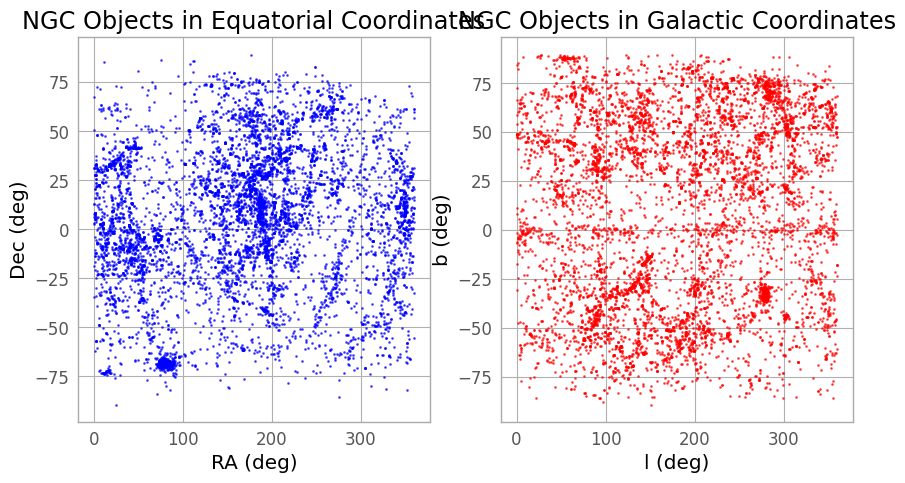

In [18]:
import numpy as np
import matplotlib.pyplot as plt

Equatorial_coords = np.loadtxt('Equatorial_coords.txt')
Galactic_coords = np.loadtxt('Galactic_coords.txt')

RA = Equatorial_coords[:, 0]
Dec = Equatorial_coords[:, 1]

l = Galactic_coords[:, 0]
b = Galactic_coords[:, 1]

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(RA, Dec, s=1, c='blue', alpha=0.6)
plt.xlabel('RA (deg)')
plt.ylabel('Dec (deg)')
plt.title('NGC Objects in Equatorial Coordinates')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(l, b, s=1, c='red', alpha=0.6)
plt.xlabel('l (deg)')
plt.ylabel('b (deg)')
plt.title('NGC Objects in Galactic Coordinates')
plt.grid(True)

print("在赤道坐标系中，在RA为0°和180°左右，Dec为0°上下25°度的范围内NGC天体明显聚集；RA为80°,Dec为-70°处明显成团")
print("在银道坐标系中，b=0°即银盘上，有不少NGC天体聚集；在b=-25°上几处和(300°, 75°)处明显成团")

### SSY: 学会用天球坐标投影

In [2]:
import numpy as np
import healpy as hp
import astropy.coordinates as coord
import astropy.units as u

total_sky_area = 4 * np.pi  
num_galaxies = 7840
average_area_per_galaxy = total_sky_area / num_galaxies

required_nside = np.sqrt(total_sky_area / (12 * average_area_per_galaxy))
required_nside = int(np.ceil(required_nside))

print("Required NSIDE: %d" %required_nside)

Required NSIDE: 26


In [ ]:
## SSY ： 12怎么来的？

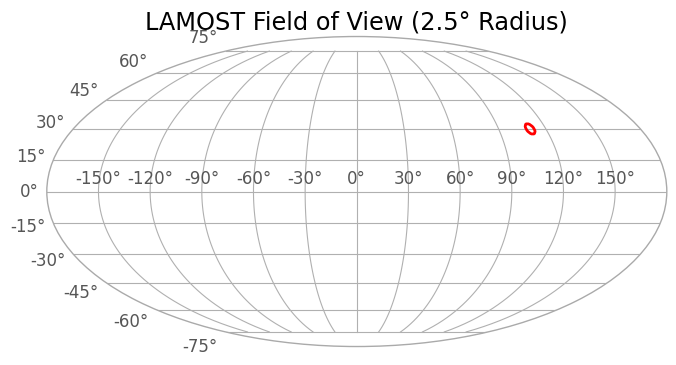

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.coordinates import SkyCoord
import astropy.units as u
from matplotlib.patches import Circle
from mpl_toolkits.mplot3d import Axes3D

ra_center = 110 * u.deg
dec_center = 30 * u.deg
field_center = SkyCoord(ra=ra_center, dec=dec_center, frame='icrs')

field_radius = 2.5 * u.deg

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='mollweide') 

ra_center_rad = field_center.ra.wrap_at(180 * u.deg).radian
dec_center_rad = field_center.dec.radian

circle = Circle((ra_center_rad, dec_center_rad), radius=field_radius.to(u.rad).value, 
                edgecolor='red', facecolor='none', lw=2, transform=ax.transData)

ax.add_patch(circle)
ax.grid(True)

plt.title("LAMOST Field of View (2.5° Radius)")
plt.show()


### SSY: 我也学到了

In [16]:
import numpy as np

d = [1e5, 1e6]   # distance: 100 kpc, 1 Mpc

Mag_sun = 4.8  # absolute magnitude of sun
R_e = 5e3  # Re = 5 kpc

ratio_L = 1e11  # L_gal/L_sun = 1e11
Mag_gal = Mag_sun - 2.5 * np.log10(ratio_L)  # absolute magnitude of the galaxy
mag_gal = Mag_gal + 5 * np.log10(d) - 5  #apparent magnitude of the galaxy
print("the apparent magnitude in 100 kpc is %f, the apparent magnitude in 1 Mpc is %f." %(mag_gal[0], mag_gal[1]))

theta_1 = R_e / d[0]  #apparent size in 100 kpc
theta_2 = R_e / d[1]  #apparent size in 1 Mpc
print("the apparent size in 100 kpc is %f rad, the apparent size in 1 Mpc is %f rad." %(theta_1, theta_2))

I = mag_gal[0] + 2.5 * np.log10(2 * np.pi * (theta_1 * 57.2957795 * 60) ** 2)  #surface brightness
print("the surface brightness is %f magarcsec^-2" %I)

the apparent magnitude in 100 kpc is -2.700000, the apparent magnitude in 1 Mpc is 2.300000.
the apparent size in 100 kpc is 0.050000 rad, the apparent size in 1 Mpc is 0.005000 rad.
the surface brightness is 10.471669 magarcsec^-2


### SSY：星系没有这么高的表面亮度，面积单位错了（是角秒，不是角分）